# Funciones de distribucion de probabilidades [Clase 45] 

![freceuncia-PDF-CDF](../Recursos/imgs/freceuncia-PDF-CDF.PNG)

**PDF**: Probability Density Function o Funcion de distribucion de probabilidad, es la curva en negro como en forma de campana. Se refiere a la probabilidad de que un valor X tome exacatemente un valor x. De hecho esta probabilidad es muy baja

**CDF**: O funcion de distribucion acumulada. Se refiere a la probabilidad de que una variable aleatoria tome ese valor x o valores menores que x.
> es la zona pintada de azul

**Curiosidad**
> de todos los tipos de distribuciones que existen las mas comunes son: *curva normal o campana de Gauss*, *distribucion uniforme*, *Distribucion de poision*, *la normal*, *multinomial* entre otras


#### **Hay dos distribuciones que necesitas conocer SI O SI**
> 1. Distribucion uniforme
> 2. Distribucion Normal o campana de Gauss

## La Distribucion uniforme

Se define con su punto de origen y su punto final (sus extremos)

![distribucion uniforme](../Recursos/imgs/distri-uniforme.PNG)

En la grafica tenemos los extremos a y b. **La probabilidad de elegir numero entre a y b es la misma**. 
> cada vez que tengas una distribucion uniforme **debes especificar entre que rango de valores a y b**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = 1
b= 100
n= 1000000 #datos entre el rango a y b, 200 es muy poco para un rango tran grande entre 100 y 200 aleatorios.
data = np.random.uniform(a,b,n)#limite inferior, superior y datos deseados. 

(array([ 99893., 100156., 100068.,  99679., 100207.,  99647., 100102.,
        100317.,  99872., 100059.]),
 array([ 1.00005599, 10.90002876, 20.80000154, 30.69997431, 40.59994708,
        50.49991985, 60.39989263, 70.2998654 , 80.19983817, 90.09981094,
        99.99978372]),
 <a list of 10 Patch objects>)

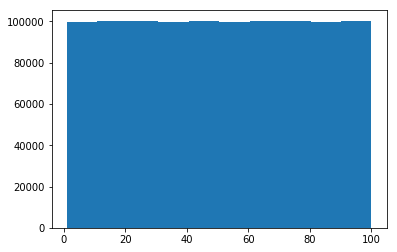

In [3]:
%matplotlib inline
plt.hist(data)

El grafico muestra una distribucion uniforme. Es decir que todos los datos tienen la misma probabilidad de salir. **Se han generado un millon de datos entre el rango de 1 a 200**

## La Distribucion Normal o campana de Gauss
![distribucion normal](../Recursos/imgs/distrinormal.PNG)

Este es el tipo de distribución más comun, lo podemos ver con las notas de un examen de fisica. La mayoria saca mala nota y muy pocos buena nota.
Los valores que definen una distribucion normal son:

**La media** Valor central. Promedio. En el grafico *este valor es de 0*

**Desviacion tipica** en el grafico este valor es de *1*

Para generar datos con distribucion normal en python usamos *(atención a las siguietnes lineas)*:

In [4]:
data = np.random.randn(1000000)

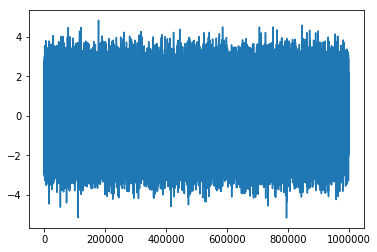

In [5]:
x = range(1,1000001)
plt.plot(x,data) #pinto grafico de los datos generados

(array([1.60000e+01, 7.45000e+02, 1.47430e+04, 1.07932e+05, 3.14017e+05,
        3.62808e+05, 1.66856e+05, 3.06310e+04, 2.17700e+03, 7.50000e+01]),
 array([-5.156877  , -4.15723193, -3.15758687, -2.15794181, -1.15829675,
        -0.15865169,  0.84099338,  1.84063844,  2.8402835 ,  3.83992856,
         4.83957363]),
 <a list of 10 Patch objects>)

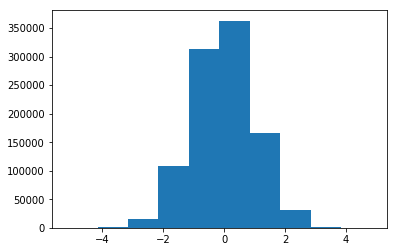

In [6]:
%matplotlib inline
plt.hist(data)

Ahora ya parece una campana en nuestro histograma

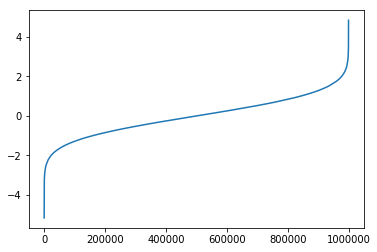

In [7]:
plt.plot(x, sorted(data)) #generamos un grafico de funcion de distribucion acumulada

Una distribucion normal se ve asi en su distribucion acumulada, la anterior es una manera de distinguirla de otro tipo de distribución

**Y si queremos otros datos de la media (mu), desviacion estandar(sd)?** veamos:

(array([  19.,  174.,  674., 1786., 2607., 2518., 1522.,  539.,  148.,
          13.]),
 array([-3.22366772, -1.44564011,  0.33238749,  2.1104151 ,  3.88844271,
         5.66647031,  7.44449792,  9.22252553, 11.00055314, 12.77858074,
        14.55660835]),
 <a list of 10 Patch objects>)

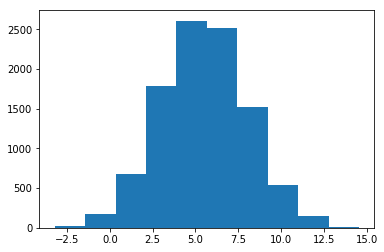

In [8]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd* Z# Z = (X-mu) / sd -> N(0,1), X= mu + sd * z === teorema central del limite o "tipificar"
plt.hist(data)

El siguiente codigo es utilizado para generar dataset aleatorios

In [9]:
data = np.random.randn(2,4) #genera dos columnas de 4 filas
data

array([[ 0.16298971,  0.01393252,  0.30190299,  0.19367313],
       [ 0.68613142, -1.42994661,  0.57312654,  0.02119408]])

## La simulación de montecarlo (Para encontrar el valor de Pi)

![formula-pi](../Recursos/imgs/pi-montecarlo.PNG)

**Que vamos a hacer?**
* Generaremos dos numeros aleatorios uniformes entre 0 y 1. Estos seran x,y 1000 veces en total
* Calcularemos x^2 + y^2
    * Si el valor es menor que 1 -> estamos dentro del circulo
    * Si el valor es mayor que 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el nuemro total de intentos para obener una aproximación de la probabilidad de caer dentro del circulo
* Usamos esa probabilidad para aproximar el valor de π
* Repetimos el experimento el numero suficiente de veces (mas o menos 200) para obtener diferentes aproximaciones de π
* Calculamos promedio de los 1000 valores para dar valor final a π

In [10]:
def pi_montecarlo(n, n_exp):   # n = valor de datos a generar ; n_exp = veces que repito el experimento
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value= 0
        x = np.random.uniform(0,1,n).tolist()#valores de 0 a 1. n datos (n=1000)
        y = np.random.uniform(0,1,n).tolist()
        
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    
    return(pi,fig)

3.140608000000002


(3.140608000000002, [<matplotlib.lines.Line2D at 0x2d79b944080>])

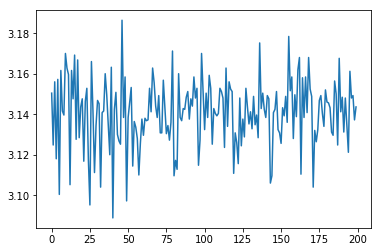

In [11]:
pi_montecarlo(10000,200)

## Dummy DataSets o DataFrames
Se trata de una lista o un array de numeros aleatorios generados con metodos que hemos visto en este notebook.

In [34]:
#vamos a generar el dataframe
n = 1000000
data = pd.DataFrame(#diccionario
    {
        'A': np.random.randn(n),# numeros aleatorios entre 0 y 1 - Distribucion normal 0 a 1
        'B': 1.5 + 2.5 * np.random.randn(n), #distribucion normal con media 1,5 y desviacion tipica 2.5
        'C': np.random.uniform(5,32,n)#valores de 5 a 32, generame n valores. Uniforme entre 5 y 32
    }
)

In [35]:
data.head()

,A,B,C
0,1.187880,-0.484215,22.790288
1,-0.654043,0.916880,22.462230
2,0.813006,3.275783,27.564514
3,0.018570,3.309699,14.780216
4,-0.666897,-2.788247,26.519728


In [36]:
data.describe() #veamos los valores para los tipos de distribucion 

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000136,1.498566,18.503637
std,1.000001,2.501207,7.790546
min,-4.460685,-10.239884,5.000034
25%,-0.674261,-0.186937,11.764498
50%,-0.000246,1.499330,18.502602
75%,0.674566,3.186372,25.242713
max,5.194904,13.265864,31.999961


(array([2.11000e+02, 5.49000e+03, 5.33830e+04, 2.15785e+05, 3.68395e+05,
        2.65578e+05, 8.03680e+04, 1.02360e+04, 5.38000e+02, 1.60000e+01]),
 array([-4.46068529, -3.49512636, -2.52956743, -1.56400851, -0.59844958,
         0.36710934,  1.33266827,  2.29822719,  3.26378612,  4.22934505,
         5.19490397]),
 <a list of 10 Patch objects>)

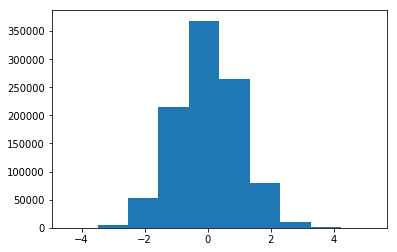

In [37]:
plt.hist(data["A"]) #pintamos la distribucion de A, es una normal estandar

(array([9.00000e+01, 2.33100e+03, 2.79960e+04, 1.44500e+05, 3.27307e+05,
        3.25775e+05, 1.42230e+05, 2.75030e+04, 2.18800e+03, 8.00000e+01]),
 array([-10.2398841 ,  -7.88930932,  -5.53873454,  -3.18815976,
         -0.83758498,   1.51298979,   3.86356457,   6.21413935,
          8.56471413,  10.91528891,  13.26586369]),
 <a list of 10 Patch objects>)

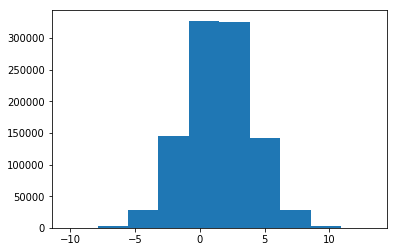

In [38]:
plt.hist(data["B"]) #pintamos la distribucion de B. Es una normal desplazada 1.5

(array([ 99914.,  99675.,  99761., 100217., 100333.,  99762.,  99958.,
        100710., 100032.,  99638.]),
 array([ 5.00003364,  7.70002634, 10.40001904, 13.10001175, 15.80000445,
        18.49999715, 21.19998985, 23.89998255, 26.59997525, 29.29996795,
        31.99996065]),
 <a list of 10 Patch objects>)

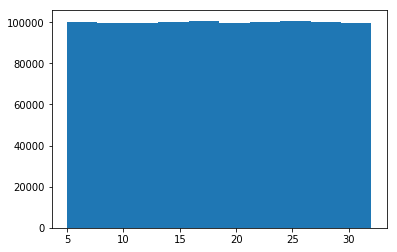

In [39]:
plt.hist(data["C"]) # es una distribucion uniforme entre 5 y 32

In [40]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [42]:
colum_names = data.columns.values.tolist()#creo lista con los nombres de las columnas

In [44]:
a = len(colum_names)
a#total de columnas

21

In [46]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42+a) #inicio a contar desde 42 
)

In [47]:
new_data

,Column Name,A,B
42,State,1.149616,0.830504
43,Account Length,-0.226930,0.987955
44,Area Code,1.494941,0.404009
45,Phone,-0.588437,0.094459
46,Int'l Plan,0.107185,0.226972
47,VMail Plan,0.428967,0.151231
48,VMail Message,-1.429941,0.907856
49,Day Mins,0.437025,0.895610
50,Day Calls,-0.823166,0.972265
51,Day Charge,-1.184058,0.016452
